**Oppgave 1:**

In [1]:
import sympy as sp

# Define unit vectors
e_vec = [
    sp.Matrix([1, 0, 0]),
    sp.Matrix([0, 1, 0]),
    sp.Matrix([0, 0, 1]),
]

indeprodukt = [
    (i, j, e_vec[i].dot(e_vec[j]))
    for i in range(len(e_vec))
    for j in range(i + 1, len(e_vec))
]

kryssprodukt = [
    (i, j, e_vec[i].cross(e_vec[j]))
    for i in range(len(e_vec))
    for j in range(i + 1, len(e_vec))
]

print("Parvise indreprodukter:")
for i, j, dot_product in indeprodukt:
    print(f"e{i+1} · e{j+1} = {dot_product}")

print("\nParvise kryssprodukter:")
for i, j, cross_product in kryssprodukt:
    print(f"e{i+1} × e{j+1} = {cross_product}")


Parvise indreprodukter:
e1 · e2 = 0
e1 · e3 = 0
e2 · e3 = 0

Parvise kryssprodukter:
e1 × e2 = Matrix([[0], [0], [1]])
e1 × e3 = Matrix([[0], [-1], [0]])
e2 × e3 = Matrix([[1], [0], [0]])


**Observasjoner**

- Prikkprodukter resulterer i 0, noe som indikerer ortogonalitet.
- Kryssprodukter følger høyrehåndsregelen: e1 × e2 = e3, e2 × e3 = e1, og e3 × e1 = e2.

**Oppgave 2:**

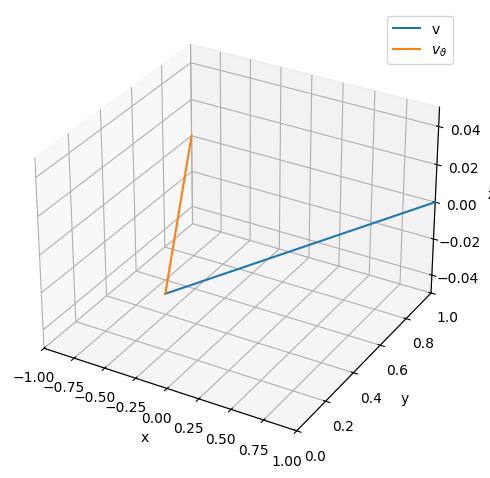

In [8]:
import sympy as sp
from sympy.plotting import plot3d_parametric_line

vec_v = sp.Matrix([[1], [1], [0]])
vec_n = sp.Matrix([[0], [0], [1]])

theta = sp.pi / 2

S_n = vec_n.hat()  # skew-symmetrix matrix

R = sp.eye(3) + sp.sin(theta) * S_n + (1 - sp.cos(theta)) * (S_n**2)

vec_v_vartheta = R * vec_v

v, v_vartheta = sp.symbols(R"v $v_{\vartheta}$")

plot = plot3d_parametric_line(
    (*v * vec_v, (v, 0, 1)),
    (*v_vartheta * vec_v_vartheta, (v_vartheta, 0, 1)),
    show=False,
    legend=True,
)

plot.show()

**Oppgave 3:**

In [3]:
import sympy as sp

sqrt_2 = sp.sqrt(2)

factor = sp.Rational(1, 4)

Q_matrix = factor * sp.Matrix(
    [
        [(sqrt_2 + 2), -2, (2 - sqrt_2)],
        [2, 2 * sqrt_2, -2],
        [(2 - sqrt_2), 2, (sqrt_2 + 2)],
    ]
)


M_matrix = sp.Matrix(
    [
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, -1],
    ]
)

Q_orthogonal = Q_matrix.T * Q_matrix == sp.eye(3)
M_orthogonal = M_matrix.T * M_matrix == sp.eye(3)

Q_determinant = Q_matrix.det()
M_determinant = M_matrix.det()

print("Q_matrise er orthogonal:", Q_orthogonal)
print("Q_matrise determinant:", Q_determinant)

print("M_matrise er orthogonal:", M_orthogonal)
print("M_matrise determinant:", M_determinant)

Q_matrise er orthogonal: False
Q_matrise determinant: 1
M_matrise er orthogonal: True
M_matrise determinant: -1


Hverken $ \mathbf{Q} $ eller $ \mathbf{M} $ tilfredstiller alle kriteriene for å klassifiseres som rotasjons matriser.

**Oppgave 4:**

In [4]:
import sympy as sp

psi, dot_psi = sp.symbols(R"psi omega")
R_matrix = sp.Matrix(
    [
        [sp.cos(psi), -sp.sin(psi), 0],
        [sp.sin(psi), sp.cos(psi), 0],
        [0, 0, 1],
    ]
)

psi_t = sp.Function("psi")(sp.Symbol("t"))
R_matrix_t = R_matrix.subs(psi, psi_t)

dR_matrix = R_matrix_t.diff(sp.Symbol("t")).subs(psi_t.diff(sp.Symbol("t")), dot_psi)
dR_matrix = dR_matrix.subs(psi_t, psi)
dR_R_T = sp.simplify(dR_matrix * R_matrix.T)
omega_vec = dR_R_T.vee()

print("Tidsderivert av rotasjonsmatrisen, dR:")
display(dR_matrix)
print("\nSkjevsymmetrisk matrise dR * R.T:")
display(dR_R_T)
print("\nVinkelhastighetsvektor ω:")
display(omega_vec)


Tidsderivert av rotasjonsmatrisen, dR:


Matrix([
[-omega*sin(psi), -omega*cos(psi), 0],
[ omega*cos(psi), -omega*sin(psi), 0],
[              0,               0, 0]])


Skjevsymmetrisk matrise dR * R.T:


Matrix([
[    0, -omega, 0],
[omega,      0, 0],
[    0,      0, 0]])


Vinkelhastighetsvektor ω:


Matrix([
[    0],
[    0],
[omega]])

**Oppgave 5**

1. **Start med den opprinnelige transformasjonen:**

   $$
   \mathbf{x} = \mathbf{R} \mathbf{x}' + \mathbf{d}
   $$

2. **Trekk fra translasjonsvektoren $\mathbf{d}$:**

   $$
   \mathbf{x} - \mathbf{d} = \mathbf{R} \mathbf{x}'
   $$

3. **Multipliser begge sider med $\mathbf{R}^\top$:**

   - Siden $\mathbf{R}^\top = \mathbf{R}^{-1}$, har vi:
     $$
     \mathbf{R}^\top (\mathbf{x} - \mathbf{d}) = \mathbf{R}^\top \mathbf{R} \mathbf{x}' = \mathbf{I} \mathbf{x}' = \mathbf{x}'
     $$

4. **Resultat av den inverse transformasjonen:**

   $$
   \mathbf{x}' = \mathbf{R}^\top (\mathbf{x} - \mathbf{d})
   $$


**Oppgave 6:**

In [5]:
import sympy as sp

psi = sp.rad(45)

R_matrix = sp.Matrix(
    [
        [sp.cos(psi), -sp.sin(psi), 0],
        [sp.sin(psi), sp.cos(psi), 0],
        [0, 0, 1],
    ]
)

d_vector = sp.Matrix([8, 2, 0])

P_matrix = sp.Matrix.hstack(R_matrix, d_vector)
P_matrix = sp.Matrix.vstack(
    P_matrix, sp.Matrix([[0, 0, 0, 1]])
)

print("stillingsmatrisen P:")
display(P_matrix)

stillingsmatrisen P:


Matrix([
[sqrt(2)/2, -sqrt(2)/2, 0, 8],
[sqrt(2)/2,  sqrt(2)/2, 0, 2],
[        0,          0, 1, 0],
[        0,          0, 0, 1]])